### In previous test, using 0x202 for registor 0xd / 0x40d / 0x80d / 0xc0d fixed double peaks in timing for 5/56 FEBs. The last FEB still saw the double peak. Run 1631 tried 0x402 for the registers. 

### Shower rate and trigger efficiency difference is also looked into here.

In [1]:
# check shower rates in crvaging-008 runs
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
from ROOT import gStyle, gROOT, gDirectory, gPad

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

tgeometry = geometry.testBenchGeometry(geometry_constants.setup_dict['crvaging-008'][0])
fileList = filepath.getfilelist(['crvaging008'], "recoROOT", 4)[0]
print("%i files in file list"%len(fileList))

pdfpages = PdfPages("timingAlignmentFEB_sync0x402_exampleEvent.pdf")
pdfout = "timingAlignmentFEB_sync0x402_spectra.pdf"

# check PE sum, see where to cut for "shower"
def plotPE(filename, pdfname):
    fFile = ROOT.TFile(filename, "READ")
    fTree = fFile.Get("run")
    runNum = filepath.filenameparser(filename, 'run')
    subrunNum = filepath.filenameparser(filename, 'subrun')
    
    hist_sum_tot = ROOT.TH1F("hist_sum_tot_run%i_%i"%(runNum, subrunNum), "Run%i_%i "%(runNum, subrunNum)+"total light yield per event; n_{PE}; count", 500, 0., 10000.)
    hist_sum_feb = [None]*6
    hist_sum_tot_goodfit = ROOT.TH1F("hist_sum_tot_goodfit_run%i_%i"%(runNum, subrunNum), "Total light yield per event (w/ good fit cut); n_{PE}; count", 500, 0., 10000.)
    hist_sum_feb_goodfit = [None]*6
    for i in range(6):
        hist_sum_feb[i] = ROOT.TH1F("hist_sum_run%i_%i_feb_%i"%(runNum, subrunNum, i), "Light yield sum per FEB; n_{PE}; count", 500, 0., 2000.)
        hist_sum_feb_goodfit[i] = ROOT.TH1F("hist_sum_run%i_%i_feb_%i_goodfit"%(runNum, subrunNum, i), "Light yield sum per FEB (w/ good fit cut); n_{PE}; count", 500, 0., 2000.)

    nplot = 0
    nEntries = fTree.GetEntries()
    for iEntry in range(nEntries):
        if iEntry % 10000 == 0:
            print("processed %i/%i entries..."%(iEntry, nEntries))
        tEvent = crv_event.crv_event(fTree, iEntry, 0b1010, 6)
        tFEBsum = np.sum(tEvent.PEsTemperatureCorrected, axis=1)
        tTOTsum = np.sum(tFEBsum)
        tFEBsum_goodfit = np.array([np.sum(tEvent.PEsTemperatureCorrected[i][tEvent.fitStatus[i]==1]) for i in range(6)])
        tTOTsum_goodfit = np.sum(tFEBsum_goodfit)
        hist_sum_tot.Fill(tTOTsum)
        hist_sum_tot_goodfit.Fill(tTOTsum_goodfit)
        for i in range(6):
            hist_sum_feb[i].Fill(tFEBsum[i])
            hist_sum_feb_goodfit[i].Fill(tFEBsum_goodfit[i])
        # if tTOTsum_goodfit > 3000 and nplot < 20:
        if np.all(tFEBsum>300) and nplot < 20:
        # if iEntry < 100:
            tEvent.plotEvent(pdfpages, [tgeometry], True)
            nplot += 1
    
    fC = ROOT.TCanvas("c%i_%i"%(runNum, subrunNum), "c%i_%i"%(runNum, subrunNum), 400*2, 300*2)
    fC.Divide(2,2,0.0001,0.001)
    
    p1 = fC.cd(1)
    gStyle.SetOptStat(111110)
    p1.SetLogy()
    hist_sum_tot.DrawClone()
    
    p2 = fC.cd(2)
    gStyle.SetOptStat(111110)
    p2.SetLogy()
    hist_sum_tot_goodfit.DrawClone()
    
    p3 = fC.cd(3)
    gStyle.SetOptStat(0)
    p3.SetLogy()
    fLegend = ROOT.TLegend(0.75, 0.6, 0.9, 0.9)
    for i in range(6):
        hist_sum_feb[i].SetLineColor(constants.rootcolors[i])
        hist_sum_feb[i].Draw("SAME" if i > 0 else "")
        fLegend.AddEntry(hist_sum_feb[i], "FEB%i"%i)
    fLegend.Draw("SAME")
    
    p4 = fC.cd(4)
    gStyle.SetOptStat(0)
    p4.SetLogy()
    fLegend = ROOT.TLegend(0.75, 0.6, 0.9, 0.9)
    for i in range(6):
        hist_sum_feb_goodfit[i].SetLineColor(constants.rootcolors[i])
        hist_sum_feb_goodfit[i].Draw("SAME" if i > 0 else "")
        fLegend.AddEntry(hist_sum_feb_goodfit[i], "FEB%i"%i)
    fLegend.Draw("SAME")
    
    fC.Print(pdfname, 'Title: Run%06i_%03i'%(runNum, subrunNum))
    
    return 

plotPE(fileList[0], pdfout+'(')
plotPE(fileList[1], pdfout)
plotPE(fileList[2], pdfout+')')

Welcome to JupyROOT 6.28/04
4 files in file list
processed 0/46402 entries...
processed 10000/46402 entries...
processed 20000/46402 entries...
processed 30000/46402 entries...
processed 40000/46402 entries...
processed 0/100512 entries...
processed 10000/100512 entries...
processed 20000/100512 entries...
processed 30000/100512 entries...
processed 40000/100512 entries...
processed 50000/100512 entries...
processed 60000/100512 entries...
processed 70000/100512 entries...
processed 80000/100512 entries...
processed 90000/100512 entries...
processed 100000/100512 entries...
processed 0/97620 entries...
processed 10000/97620 entries...
processed 20000/97620 entries...
processed 30000/97620 entries...
processed 40000/97620 entries...
processed 50000/97620 entries...
processed 60000/97620 entries...
processed 70000/97620 entries...
processed 80000/97620 entries...
processed 90000/97620 entries...


In [2]:
pdfpages.close()
from IPython.display import IFrame
IFrame("timingAlignmentFEB_sync0x402_exampleEvent.pdf", width=800, height=600)

In [3]:
IFrame(pdfout, width=800, height=600)

In [4]:
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
%jsroot on
# from ROOT import TCanvas, TH1F, TH2F, TF1, TMath, TGraph, TFile, TSpectrum, TPaveText, TMultiGraph, TGraphErrors, TLine
from ROOT import gStyle, gROOT, gDirectory, gPad

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

tgeometry = geometry.testBenchGeometry(geometry_constants.setup_dict['crvaging-008'][0])

testFileList = filepath.getfilelist([1631],"recoROOT",4)[0]
refFileList = filepath.getfilelist([1619],"recoROOT",4)[0]

tmin = -35.
tmax = 35.
nbin = 140
singleFEBshowerthres = 500
singleChThres = 5

def timeDiff(filelist, tag):
    hist_diffpercounter = [[None]*32 for i in range(6)] # time difference between two channels in a counter
    hist_diffbtwlayerinfeb = [[None]*15 for i in range(6)] # time difference between two neighboring (vertical) counters in the same FEB
    hist_diffbtwfeb = [[None]*15 for i in range(2)] # time difference between two neighboring (vertical) counters in different FEBs (0 & 1, then 4 & 5)
    
    for i in range(6):
        for j in range(32):
            hist_diffpercounter[i][j] = ROOT.TH1F("hist_diffpercounter_feb%i_cntr%i"%(i,j)+"_"+tag, 
                                                  "Time difference between FEB%i Ch%i and Ch%i (same counter/CMB); t_{diff} [ns]; count"%(i, 2*j, 2*j+1), 
                                                  nbin, tmin, tmax)
    
    ch_btwlayerinfeb_list = [(2+2*i, 32+2*i) for i in range(15)]
    for i in range(6):
        for j in range(15):
            hist_diffbtwlayerinfeb[i][j] = ROOT.TH1F("hist_diffbtwlayerinfeb_feb%i_cntr%i"%(i,j)+"_"+tag, 
                                                     "Time difference between FEB%i Ch%i and Ch%i (neighboring layer); t_{diff} [ns]; count"%(i, ch_btwlayerinfeb_list[j][0], ch_btwlayerinfeb_list[j][1]), 
                                                     nbin, tmin, tmax)
    
    ch_btwfeb_list = [[(0, 2*i, 1, 34+2*i) for i in range(15)], [(4, 34+2*i, 5, 2*i) for i in range(15)]]
    for i in range(2):
        for j in range(15):
            hist_diffbtwfeb[i][j] = ROOT.TH1F("hist_diffbtwfeb_%i_%i"%(i,j)+"_"+tag, 
                                              "Time difference between FEB%i Ch%i and FEB%i Ch%i (neighboring layer); t_{diff} [ns]; count"%ch_btwfeb_list[i][j], 
                                              nbin, tmin, tmax)

    for filename in filelist:
        print("Processing file %s"%(filename.split('/')[-1]))
        fFile = ROOT.TFile(filename, "READ")
        fTree = fFile.Get("run")
        nEntries = fTree.GetEntries()
        for iEntry in range(nEntries):
            if iEntry % 10000 == 0:            
                print("processed %i/%i entries..."%(iEntry, nEntries))            
            tEvent = crv_event.crv_event(fTree, iEntry, 0b1010, 6)
            tgoodhitPE = [tEvent.PEsTemperatureCorrected[i][tEvent.fitStatus[i]==1] for i in range(6)]
            if np.all(np.array([np.sum(tgoodhitPE[i]) for i in range(6)])<singleFEBshowerthres): # only look at more muonic events
                
                for i in range(6):
                    for j in range(32):
                        if tEvent.fitStatus[i][2*j]==1 and tEvent.fitStatus[i][2*j+1]==1 and tEvent.PEsTemperatureCorrected[i][2*j]>singleChThres and tEvent.PEsTemperatureCorrected[i][2*j+1]>singleChThres:
                            hist_diffpercounter[i][j].Fill(tEvent.time[i][2*j]-tEvent.time[i][2*j+1])
                
                for i in range(6):
                    for j in range(15):
                        ch0, ch1 = ch_btwlayerinfeb_list[j]
                        if tEvent.fitStatus[i][ch0]==1 and tEvent.fitStatus[i][ch1]==1 and tEvent.PEsTemperatureCorrected[i][ch0]>singleChThres and tEvent.PEsTemperatureCorrected[i][ch1]>singleChThres:
                            hist_diffbtwlayerinfeb[i][j].Fill(tEvent.time[i][ch0]-tEvent.time[i][ch1])
                
                for i in range(2):
                    for j in range(15):
                        feb0, ch0, feb1, ch1 = ch_btwfeb_list[i][j]
                        if tEvent.fitStatus[feb0][ch0]==1 and tEvent.fitStatus[feb1][ch1]==1 and tEvent.PEsTemperatureCorrected[feb0][ch0]>singleChThres and tEvent.PEsTemperatureCorrected[feb1][ch1]>singleChThres:
                            hist_diffbtwfeb[i][j].Fill(tEvent.time[feb0][ch0]-tEvent.time[feb1][ch1])

        fFile.Close()
    return hist_diffpercounter, hist_diffbtwlayerinfeb, hist_diffbtwfeb

In [5]:
hist_diffpercounterRef, hist_diffbtwlayerinfebRef, hist_diffbtwfebRef = timeDiff(refFileList, 'ref')
hist_diffpercounterTest, hist_diffbtwlayerinfebTest, hist_diffbtwfebTest = timeDiff(testFileList, 'test')

pdfout = "timingAlignmentFEB_sync0x402.pdf"

c01 = ROOT.TCanvas("c01", "c01", 640, 360)
gStyle.SetOptStat(0)
c01.SetLogy()
c01.Print(pdfout+'[', 'pdf')

for i in range(6):
    for j in range(32):
        hist_diffpercounterRef[i][j].SetLineColor(2)
        hist_diffpercounterTest[i][j].SetLineColor(4)
        hist_diffpercounterRef[i][j].Draw()
        hist_diffpercounterTest[i][j].Draw("SAME")
        
        fLegend = ROOT.TLegend(.55, .65, .89, .89)
        fLegend.SetFillColor(0)
        fLegend.SetFillColorAlpha(0,0)
        fLegend.AddEntry(hist_diffpercounterRef[i][j], "#splitline{Ref. sync. = 0x202, Run 1619}{#mu = %.3lf, #sigma = %.3lf}"%(hist_diffpercounterRef[i][j].GetMean(), hist_diffpercounterRef[i][j].GetRMS()))
        fLegend.AddEntry(hist_diffpercounterTest[i][j], "#splitline{Test. sync. = 0x402, Run 1631}{#mu = %.3lf, #sigma = %.3lf}"%(hist_diffpercounterTest[i][j].GetMean(), hist_diffpercounterTest[i][j].GetRMS()))
        fLegend.Draw("SAME")

        c01.Print(pdfout, 'Title: Same Counter FEB%i-%i'%(i,j))

for i in range(6):
    for j in range(15):
        hist_diffbtwlayerinfebRef[i][j].SetLineColor(2)
        hist_diffbtwlayerinfebTest[i][j].SetLineColor(4)
        hist_diffbtwlayerinfebRef[i][j].Draw()
        hist_diffbtwlayerinfebTest[i][j].Draw("SAME")
        
        fLegend = ROOT.TLegend(.55, .65, .89, .89)
        fLegend.SetFillColor(0)
        fLegend.SetFillColorAlpha(0,0)
        fLegend.AddEntry(hist_diffbtwlayerinfebRef[i][j], "#splitline{Ref. sync. = 0x202, Run 1619}{#mu = %.3lf, #sigma = %.3lf}"%(hist_diffbtwlayerinfebRef[i][j].GetMean(), hist_diffbtwlayerinfebRef[i][j].GetRMS()))
        fLegend.AddEntry(hist_diffbtwlayerinfebTest[i][j], "#splitline{Test. sync. = 0x402, Run 1631}{#mu = %.3lf, #sigma = %.3lf}"%(hist_diffbtwlayerinfebTest[i][j].GetMean(), hist_diffbtwlayerinfebTest[i][j].GetRMS()))
        fLegend.Draw("SAME")
        
        c01.Print(pdfout, 'Title: Neighboring Layer FEB%i-%i'%(i,j))

for i in range(2):
    for j in range(15):
        hist_diffbtwfebRef[i][j].SetLineColor(2)
        hist_diffbtwfebTest[i][j].SetLineColor(4)
        hist_diffbtwfebRef[i][j].Draw()
        hist_diffbtwfebTest[i][j].Draw("SAME")
        
        fLegend = ROOT.TLegend(.55, .65, .89, .89)
        fLegend.SetFillColor(0)
        fLegend.SetFillColorAlpha(0,0)
        fLegend.AddEntry(hist_diffbtwfebRef[i][j], "#splitline{Ref. sync. = 0x202, Run 1619}{#mu = %.3lf, #sigma = %.3lf}"%(hist_diffbtwfebRef[i][j].GetMean(), hist_diffbtwfebRef[i][j].GetRMS()))
        fLegend.AddEntry(hist_diffbtwfebTest[i][j], "#splitline{Test. sync. = 0x402, Run 1631}{#mu = %.3lf, #sigma = %.3lf}"%(hist_diffbtwfebTest[i][j].GetMean(), hist_diffbtwfebTest[i][j].GetRMS()))
        fLegend.Draw("SAME")
        
        c01.Print(pdfout, 'Title: Different FEBs %i-%i'%(i,j))

c01.Print(pdfout+']', 'pdf')
IFrame(pdfout, width=800, height=600)

Processing file rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001619_000.root
processed 0/100512 entries...
processed 10000/100512 entries...
processed 20000/100512 entries...
processed 30000/100512 entries...
processed 40000/100512 entries...
processed 50000/100512 entries...
processed 60000/100512 entries...
processed 70000/100512 entries...
processed 80000/100512 entries...
processed 90000/100512 entries...
processed 100000/100512 entries...
Processing file rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001631_000.root
processed 0/97620 entries...
processed 10000/97620 entries...
processed 20000/97620 entries...
processed 30000/97620 entries...
processed 40000/97620 entries...
processed 50000/97620 entries...
processed 60000/97620 entries...
processed 70000/97620 entries...
processed 80000/97620 entries...
processed 90000/97620 entries...


Text(0, 0.5, 'counts')

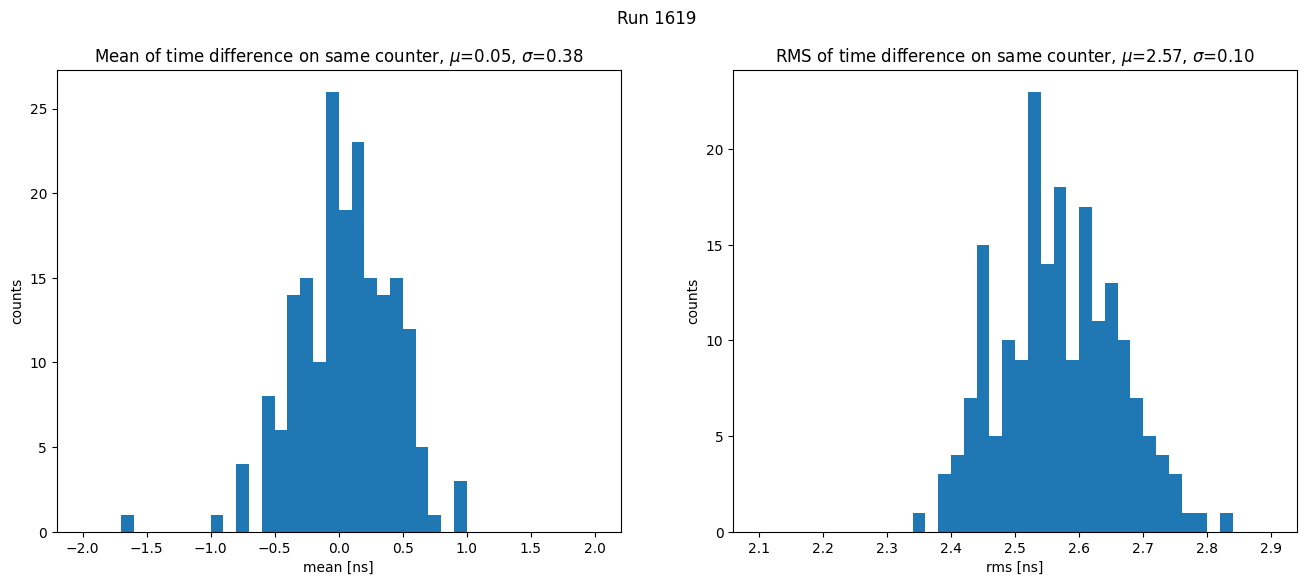

In [6]:
histmean = np.array([[hist_diffpercounterRef[i][j].GetMean() for j in range(32)]for i in range(6)]).flatten()
histrms = np.array([[hist_diffpercounterRef[i][j].GetStdDev() for j in range(32)]for i in range(6)]).flatten()
fig, axes = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Run 1619')
axes[0].hist(histmean, [-2.+0.1*i for i in range(40+1)])
axes[0].set_title("Mean of time difference on same counter, "+r'$\mu$'+"=%.2f"%(np.mean(histmean))+r', $\sigma$'+"=%.2f"%(np.std(histmean)))
axes[0].set_xlabel("mean [ns]")
axes[0].set_ylabel("counts")
axes[1].hist(histrms, [2.1+0.02*i for i in range(40+1)])
axes[1].set_title("RMS of time difference on same counter, "+r'$\mu$'+"=%.2f"%(np.mean(histrms))+r', $\sigma$'+"=%.2f"%(np.std(histrms)))
axes[1].set_xlabel("rms [ns]")
axes[1].set_ylabel("counts")

Text(0, 0.5, 'counts')

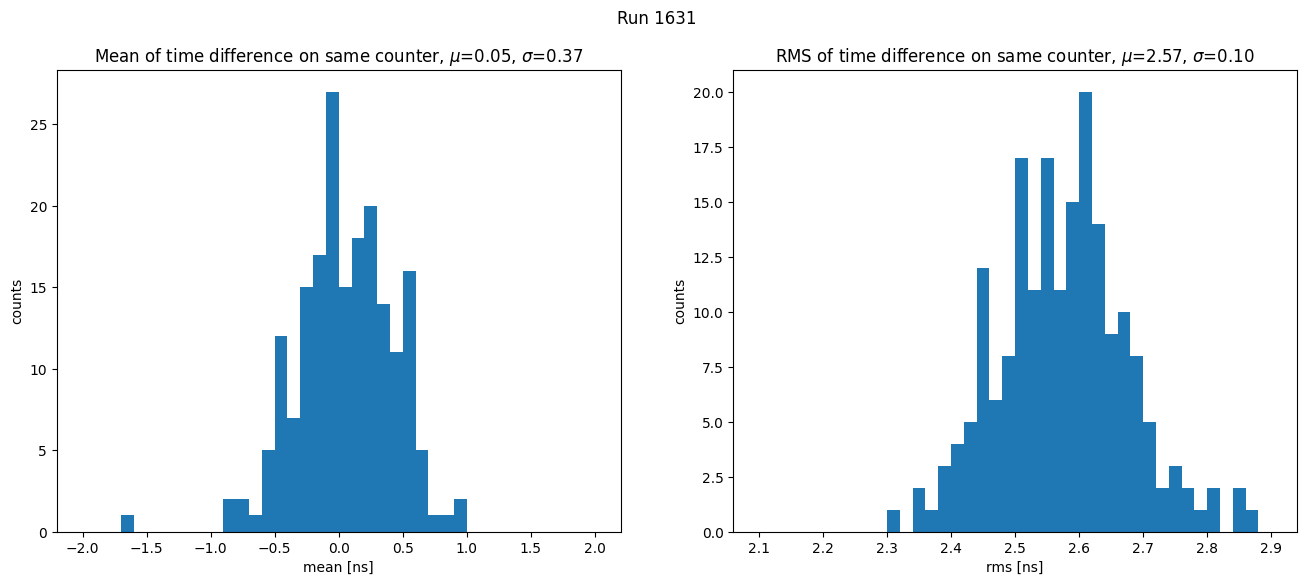

In [7]:
histmean = np.array([[hist_diffpercounterTest[i][j].GetMean() for j in range(32)]for i in range(6)]).flatten()
histrms = np.array([[hist_diffpercounterTest[i][j].GetStdDev() for j in range(32)]for i in range(6)]).flatten()
fig, axes = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Run 1631')
axes[0].hist(histmean, [-2.+0.1*i for i in range(40+1)])
axes[0].set_title("Mean of time difference on same counter, "+r'$\mu$'+"=%.2f"%(np.mean(histmean))+r', $\sigma$'+"=%.2f"%(np.std(histmean)))
axes[0].set_xlabel("mean [ns]")
axes[0].set_ylabel("counts")
axes[1].hist(histrms, [2.1+0.02*i for i in range(40+1)])
axes[1].set_title("RMS of time difference on same counter, "+r'$\mu$'+"=%.2f"%(np.mean(histrms))+r', $\sigma$'+"=%.2f"%(np.std(histrms)))
axes[1].set_xlabel("rms [ns]")
axes[1].set_ylabel("counts")

The double peak problem seems gone. However, the trigger rates along the paddle do not seem uniform? 

Welcome to JupyROOT 6.28/04
processed 0/46402 entries...
processed 10000/46402 entries...
processed 20000/46402 entries...
processed 30000/46402 entries...
processed 40000/46402 entries...
processed 0/100512 entries...
processed 10000/100512 entries...
processed 20000/100512 entries...
processed 30000/100512 entries...
processed 40000/100512 entries...
processed 50000/100512 entries...
processed 60000/100512 entries...
processed 70000/100512 entries...
processed 80000/100512 entries...
processed 90000/100512 entries...
processed 100000/100512 entries...
processed 0/97620 entries...
processed 10000/97620 entries...
processed 20000/97620 entries...
processed 30000/97620 entries...
processed 40000/97620 entries...
processed 50000/97620 entries...
processed 60000/97620 entries...
processed 70000/97620 entries...
processed 80000/97620 entries...
processed 90000/97620 entries...
processed 0/89594 entries...
processed 10000/89594 entries...
processed 20000/89594 entries...
processed 30000/895

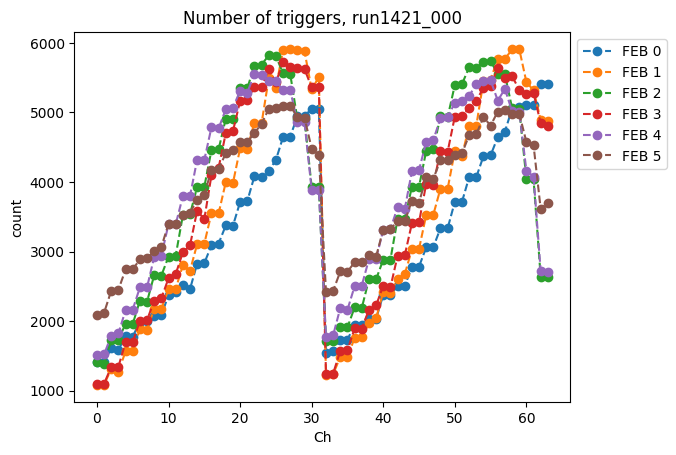

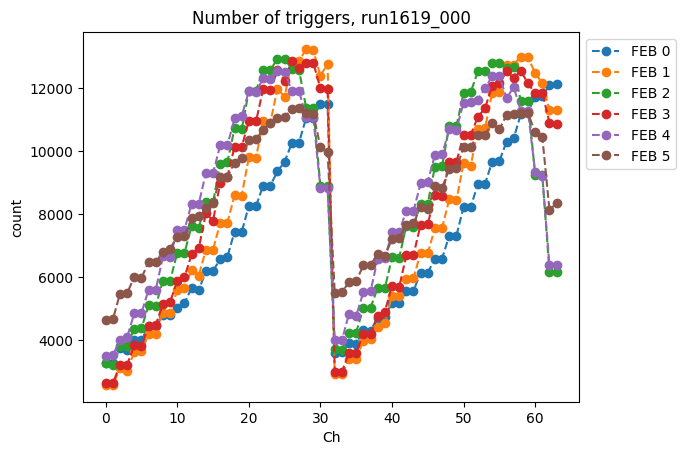

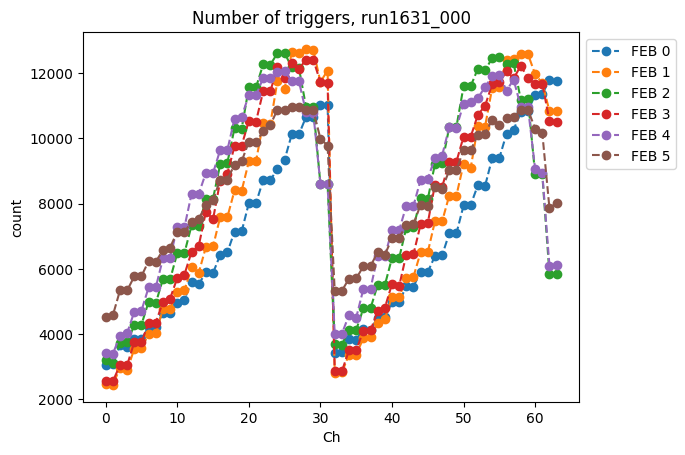

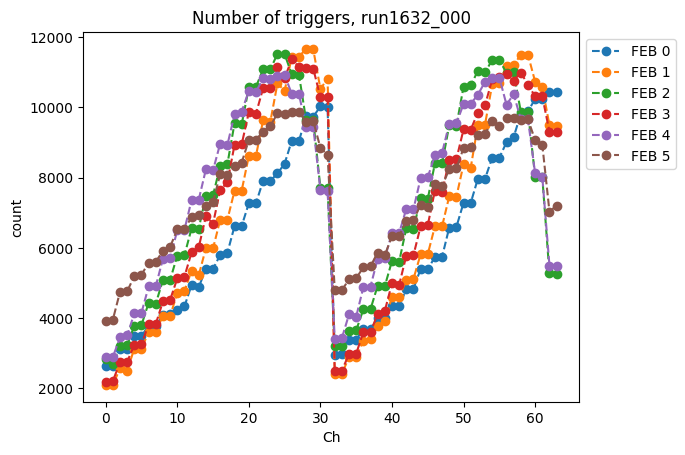

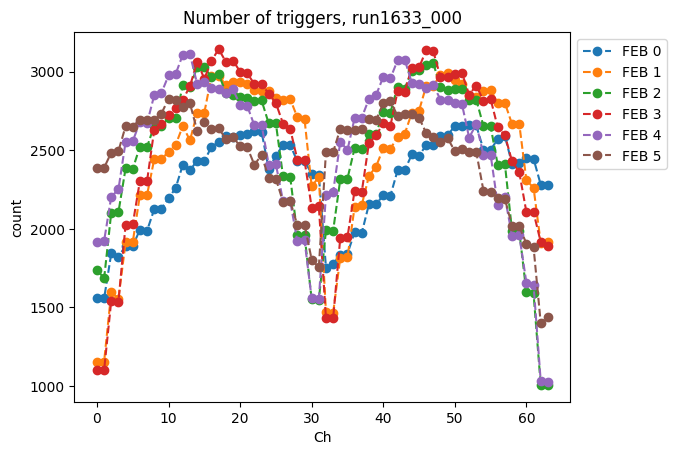

In [1]:
# check shower rates in crvaging-008 runs
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
from ROOT import gStyle, gROOT, gDirectory, gPad

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

fileList = filepath.getfilelist(['crvaging008', 1633], "recoROOT", 4)[0]

for filename in fileList:
    fFile = ROOT.TFile(filename, "READ")
    fTree = fFile.Get("run")
    runNum = filepath.filenameparser(filename, 'run')
    subrunNum = filepath.filenameparser(filename, 'subrun')
    
    ch_count = np.array([[0 for iCh in range(64)] for iFEB in range(6)])
    
    nEntries = fTree.GetEntries()
    for iEntry in range(nEntries):
        if iEntry % 10000 == 0:
            print("processed %i/%i entries..."%(iEntry, nEntries))
        tEvent = crv_event.crv_event(fTree, iEntry, 0b1010, 6)
        
        ch_count = np.add(ch_count, tEvent.PEsTemperatureCorrected > 6).astype(int)
    
    plt.figure()
    for iFEB in range(6):
        plts = plt.plot(np.array([i for i in range(64)]), ch_count[iFEB], '--o', label = 'FEB %i'%iFEB)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.title('Number of triggers, run%04i_%03i'%(runNum, subrunNum))
    plt.xlabel('Ch')    
    plt.ylabel('count')
        

### Tigger rate over time:

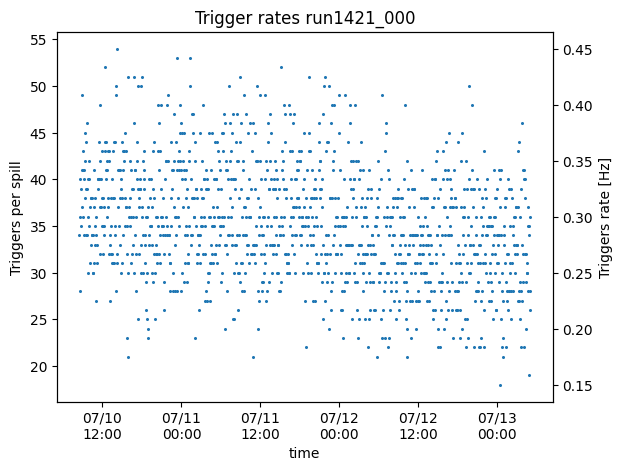

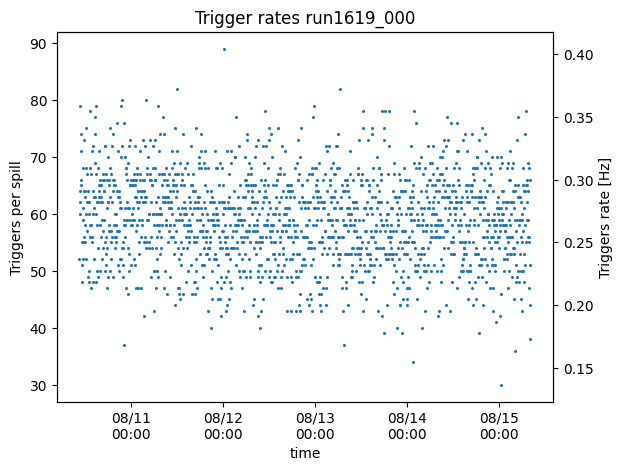

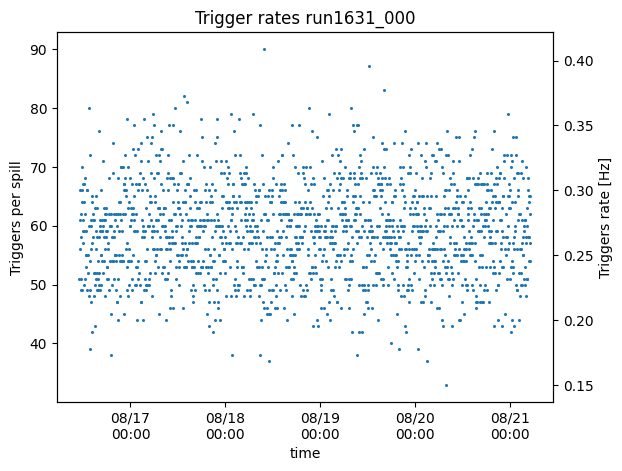

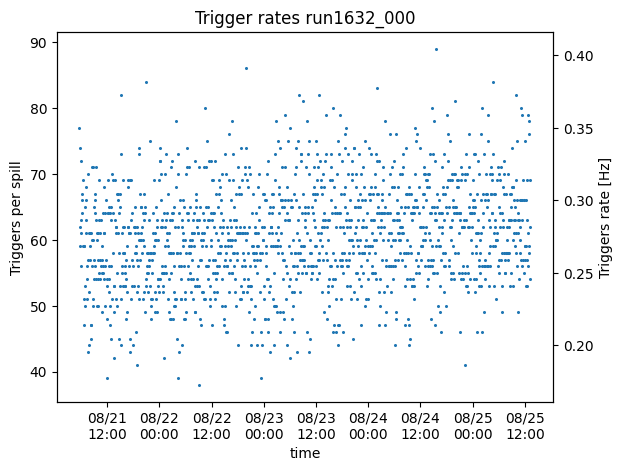

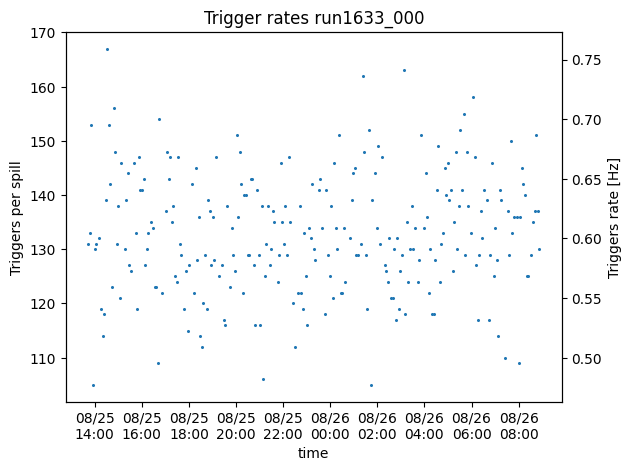

In [9]:
from matplotlib.dates import DateFormatter

tcollectionperspill = 220. #s

for filename in fileList:
    fFile = ROOT.TFile(filename, "READ")
    runNum = filepath.filenameparser(filename, 'run')
    subrunNum = filepath.filenameparser(filename, 'subrun')
    
    spilltree = fFile.Get("spills")
    nSpill = spilltree.GetEntries()
    
    ts_list = []
    ntrig_list = []
    
    nSpill = spilltree.GetEntries()
    for iSpill in range(nSpill):
        tSpill = crv_spill.crv_spill(spilltree, iSpill, False, True)
        if tSpill.nEventsActual > 0:
            ts_list.append(tSpill.tsEpoch)
            ntrig_list.append(tSpill.nEventsActual)
            
    fig,ax = plt.subplots()
    ax.plot_date(utils.ts2datetime(ts_list), ntrig_list, 'o', markersize=1.2, rasterized=True, color=constants.colors[0])
    plt.gca().xaxis.set_major_formatter(DateFormatter('%m/%d\n%H:%M'))
    ax2 = ax.twinx()
    ax.set_title('Trigger rates run%04i_%03i'%(runNum, subrunNum))
    ax.set_xlabel('time')    
    ax.set_ylabel('Triggers per spill')
    ax2.set_ylabel('Triggers rate [Hz]')
    
    rate = lambda count: float(count)/(tcollectionperspill if runNum!=1421 else 120)
    ymin, ymax = ax.get_ylim()
    ax2.set_ylim(rate(ymin), rate(ymax))
    ax2.plot([],[])